In [21]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [22]:
# Importer les modules liés à PySpark
import pyspark
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = 'python'

# Your SparkSession creation code here


# Définir la mémoire maximale pour Spark
MAX_MEMORY = '15G'

# Configurer et initialiser une session Spark
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)

def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

# Créer une session Spark
spark = init_spark()

# Spécifier le fichier de données à charger
filename_data = 'endomondoHR.json'

# Charger les données dans un DataFrame PySpark en supprimant les lignes mal formées
df = spark.read.json(filename_data, mode="DROPMALFORMED")

# Afficher le type du DataFrame pour vérifier qu'il s'agit d'un DataFrame PySpark
print('Data frame type: ' + str(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


In [23]:
# Affichons la structure du DataFrame
print('structure du DataFrame')
df.printSchema()
print('Les colonnes')
# Créons un DataFrame Pandas avec les types de données de chaque colonne du DataFrame PySpark df et affichons le.
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

structure du DataFrame
root
 |-- altitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- gender: string (nullable = true)
 |-- heart_rate: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- id: long (nullable = true)
 |-- latitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- longitude: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- speed: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- sport: string (nullable = true)
 |-- timestamp: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- url: string (nullable = true)
 |-- userId: long (nullable = true)

Les colonnes


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


In [24]:
# import pandas as pd
# import pandas_profiling as pp

# # Convertir le DataFrame PySpark en DataFrame Pandas
# pandas_df = df.toPandas()

# # Utiliser pandas_profiling sur le DataFrame Pandas
# profile_report = pp.ProfileReport(pandas_df)
# profile_report


In [25]:
# Affiche un résumé des statistiques des colonnes contenant des chaînes de caractères et des données numériques du DataFrame.
print('Résumé des statistiques pour les colonnes de chaînes de caractères et les colonnes numériques :')
df.describe().toPandas()


# Affiche le nombre total de lignes dans le DataFrame
print(f'Le DataFrame contient {df.count()} lignes. Affichons les 2 premières lignes :')
df.limit(2).toPandas()


Résumé des statistiques pour les colonnes de chaînes de caractères et les colonnes numériques :


,summary,gender,id,sport,url,userId
0,count,253020,253020,253020,253020,253020
1,mean,None,3.566244412926132E8,None,None,4619648.939783417
2,stddev,None,1.574845634895318E8,None,None,3932877.7296880507
3,min,female,99296,aerobics,https://www.endomondo.com/users/10014612/worko...,69
4,max,unknown,674008008,yoga,https://www.endomondo.com/users/9991401/workou...,15481421


Le DataFrame contient 253020 lignes. Affichons les 2 premières lignes :


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915


Detection valeurs manquantes

In [26]:
print('Colonnes')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Colonnes


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


In [27]:
# Créons une liste des noms des colonnes contenant des chaînes de caractères dans le DataFrame
string_columns = ['gender', 'sport', 'url']

# Créons une liste des noms des colonnes contenant des données numériques dans le DataFrame.
numeric_columns = ['id', 'userId']

# Créons une liste des noms des colonnes contenant des tableaux (arrays) dans le DataFrame.
array_columns = ['altitude', 'heart_rate', 'latitude', 'longitude', 'speed', 'timestamp']

# Initialisons un dictionnaire vide pour stocker le nombre de valeurs manquantes pour chaque colonne.
missing_values = {}

# Parcourons chaque colonne du DataFrame
for column in df.columns:
    # Si la colonne contient des chaînes de caractères, comptons les valeurs None et Null
    if column in string_columns:
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column: missing_count})
        
    # Si la colonne contient des données numériques, comptons les valeurs 0, None et NaN
    if column in numeric_columns:
        missing_count = df.where(col(column).isin([0, None, np.nan])).count()
        missing_values.update({column: missing_count})
        
    # Si la colonne contient des tableaux, comptons les valeurs 0 et NaN
    if column in array_columns:
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column: missing_count})

# Convertissons le dictionnaire contenant les valeurs manquantes en un DataFrame Pandas et affichons-le
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,40848,0,1280,0,113,113,7741,0,0,0,0


In [28]:
# Ajoutons une nouvelle colonne pour compter le nombre de timestamps enregistrés par ligne/séance d'entraînement,
# nommée 'PerWorkoutRecordCount'
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))

# Création de la fonction
def user_activity_workout_summarize(df):
    # Comptons le nombre d'utilisateurs distincts
    user_count = format(df.select('userId').distinct().count(), ',d')
    # Comptons le nombre de séances d'entraînement distinctes
    workout_count = format(df.select('id').distinct().count(), ',d')
    # Comptons le nombre de types d'activités sportives distincts
    activity_count = str(df.select('sport').distinct().count())
    # Calculons le nombre total d'enregistrements
    sum_temp = df.agg(functions.sum('PerWorkoutRecordCount')).toPandas()
    total_records_count = format(sum_temp['sum(PerWorkoutRecordCount)'][0], ',d')
    
    # Créons un DataFrame Pandas pour résumer les informations précédentes
    columns = ['Users count', 'Activity types count', 'Workouts count', 'Total records count']
    data = [[user_count], [activity_count], [workout_count], [total_records_count]]
    sum_dict = {column: data[i] for i, column in enumerate(columns)}
    sum_df = pd.DataFrame.from_dict(sum_dict)[columns]
    
    # Comptons le nombre d'utilisateurs par genre
    gender_user_count = df.select('gender', 'userId').distinct().groupBy('gender').count().toPandas()
    # Comptons le nombre d'activités (séances d'entraînement) par genre
    gender_activities_count = df.groupBy('gender').count().toPandas()
    # Joint les deux DataFrames précédents pour obtenir le nombre d'utilisateurs et d'activités par genre
    gender_user_activity_count = gender_user_count.join(
        gender_activities_count.set_index('gender'), on='gender',
        how='inner', lsuffix='_gu'
    )
    gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
    
    return sum_df, gender_user_activity_count

# Utilisons la fonction pour obtenir un résumé des données avant filtrage
sum_dfs = user_activity_workout_summarize(df)
print('\nRésumé du jeu de données sur les utilisateurs, les entraînements et le nombre d\'enregistrements (avant filtrage) :')
sum_dfs[0]



Résumé du jeu de données sur les utilisateurs, les entraînements et le nombre d'enregistrements (avant filtrage) :


,Users count,Activity types count,Workouts count,Total records count
0,"1,104",49,"253,020","111,541,956"


Nous avons plus 111 Millions de données monsieur 😂

In [29]:
df.show(5)
# df.show(5, truncate=False)



+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|            altitude|gender|          heart_rate|       id|            latitude|           longitude|               speed|           sport|           timestamp|                 url|  userId|PerWorkoutRecordCount|
+--------------------+------+--------------------+---------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------+---------------------+
|[41.6, 40.6, 40.6...|  male|[100, 111, 120, 1...|396826535|[60.1733487658202...|[24.6497704088687...|[6.8652, 16.4736,...|            bike|[1408898746, 1408...|https://www.endom...|10921915|                  500|
|[38.4, 39.0, 39.0...|  male|[100, 105, 111, 1...|392337038|[60.1732475962489...|[24.6498552337288...|[9.0792, 13.284, ...|            bike|[140

In [30]:
# Ici je teste une fonctionnalité avancée de spark : l'évaluation paresseuse (lazy evaluation).
# https://data-flair.training/blogs/apache-spark-lazy-evaluation/

# L'évaluation paresseuse réduit le temps d'exécution des opérations RDD en maintenant un graphe de lignage pour se souvenir des opérations sur RDD.
# Tous les traitements dans PySpark sont des abstractions. Lorsque nous voulons retourner les résultats, nous disons à Spark quel est le résultat final souhaité 
# et il détermine la meilleure façon d'y parvenir.
# En conséquence, cela optimise les performances et assure la tolérance aux pannes.

# Pour voir le résultat, nous devons appeler Spark.collect().
# Normalement, nous pouvons montrer les résultats avec la syntaxe : df.take(k) ou df.limit(k) pour obtenir les résultats avec k lignes.

# Lorsque K devient un grand nombre, ces 2 méthodes ci-dessus prennent beaucoup de temps pour terminer le processus.
# Afin de traiter rapidement, nous devrions utiliser df.collect()[:k] pour retourner les k lignes souhaitées.

# Sélectionnons les colonnes 'sport' et 'userId' du DataFrame, supprimons les doublons et comptons le nombre d'utilisateurs par type de sport
ranked_sport_users_df = df.select(df.sport, df.userId) \
    .distinct() \
    .groupBy(df.sport) \
    .count() \
    .orderBy("count", ascending=False)

# Top 5 des types d'entraînement
highest_sport_users_df = ranked_sport_users_df.limit(5).toPandas()
# Renomme la colonne 'count' en 'Users count'
highest_sport_users_df.rename(columns={'count': 'Users count'}, inplace=True)
# Calcule le nombre total d'utilisateurs
total_sports_users = ranked_sport_users_df.groupBy().sum().collect()[0][0]


In [31]:
print(highest_sport_users_df)


              sport  Users count
0               run          865
1              bike          794
2     mountain bike          336
3  bike (transport)          252
4              walk          209


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Créer une palette de couleurs Seaborn
color = sns.color_palette()

# Configurer le mode hors ligne de Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Calculer le pourcentage des 5 sports les plus populaires par rapport au nombre total d'utilisateurs
highest_sport_users_df_renamed = highest_sport_users_df
highest_sport_users_df_renamed['percentage'] = highest_sport_users_df['Users count'] / total_sports_users * 100

# Ajouter une catégorie "others" pour regrouper les autres sports
others = {
    'sport': 'others',
    'Users count': total_sports_users - sum(highest_sport_users_df_renamed['Users count']),
    'percentage': 100 - sum(highest_sport_users_df_renamed['percentage'])
}

highest_sport_users_df_renamed = highest_sport_users_df_renamed.append(others, ignore_index=True)

print('Top 5 des sports avec le plus de users:')
print(highest_sport_users_df_renamed)

# Créer un DataFrame contenant le nombre d'utilisateurs pour chaque sport
dist = highest_sport_users_df_renamed.set_index('sport')['Users count']

# Créer un diagramme circulaire en utilisant Plotly Express
cerclefig = px.pie(dist.reset_index(), values='Users count', names='sport', title='Top 5 des sports avec le plus de users . Pie Donut')

# Créer un histogramme en utilisant Plotly Express
barfig = px.bar(dist.reset_index(), x='sport', y='Users count', text='Users count', title='Top 5 des sports avec le plus de users . Bar Histogramme')

# Mettre à jour les couleurs du diagramme
colors = ['mediumturquoise', 'darkorange','#9c2b04','#a18f54','#f04e9e','#7fb519']
barfig.update_traces(marker=dict(color=colors, line=dict(color='#000000', width=2)))

cerclefig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=3)))




Top 5 des sports avec le plus de users:
              sport  Users count  percentage
0               run          865   25.130738
1              bike          794   23.067984
2     mountain bike          336    9.761766
3  bike (transport)          252    7.321325
4              walk          209    6.072051
5            others          986   28.646136


C:\Users\oumar\AppData\Local\Temp\ipykernel_19996\1509608143.py:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Les activités de course, de marche et de vélo sont les plus pratiquées par les utilisateurs. 

In [33]:
# Créer un DataFrame montrant le nombre d'activités par sport et par genre
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()

# Afficher les 5 premières lignes du DataFrame
print(activities_by_gender.head())


                     sport  gender   count
0                   hiking  female      71
1  core stability training    male    1103
2                      run    male  107882
3                 kayaking    male     253
4            mountain bike    male   12782


Il Y a au total: 49 activitées et voici le graphe pour les activitées basée sur le genre:


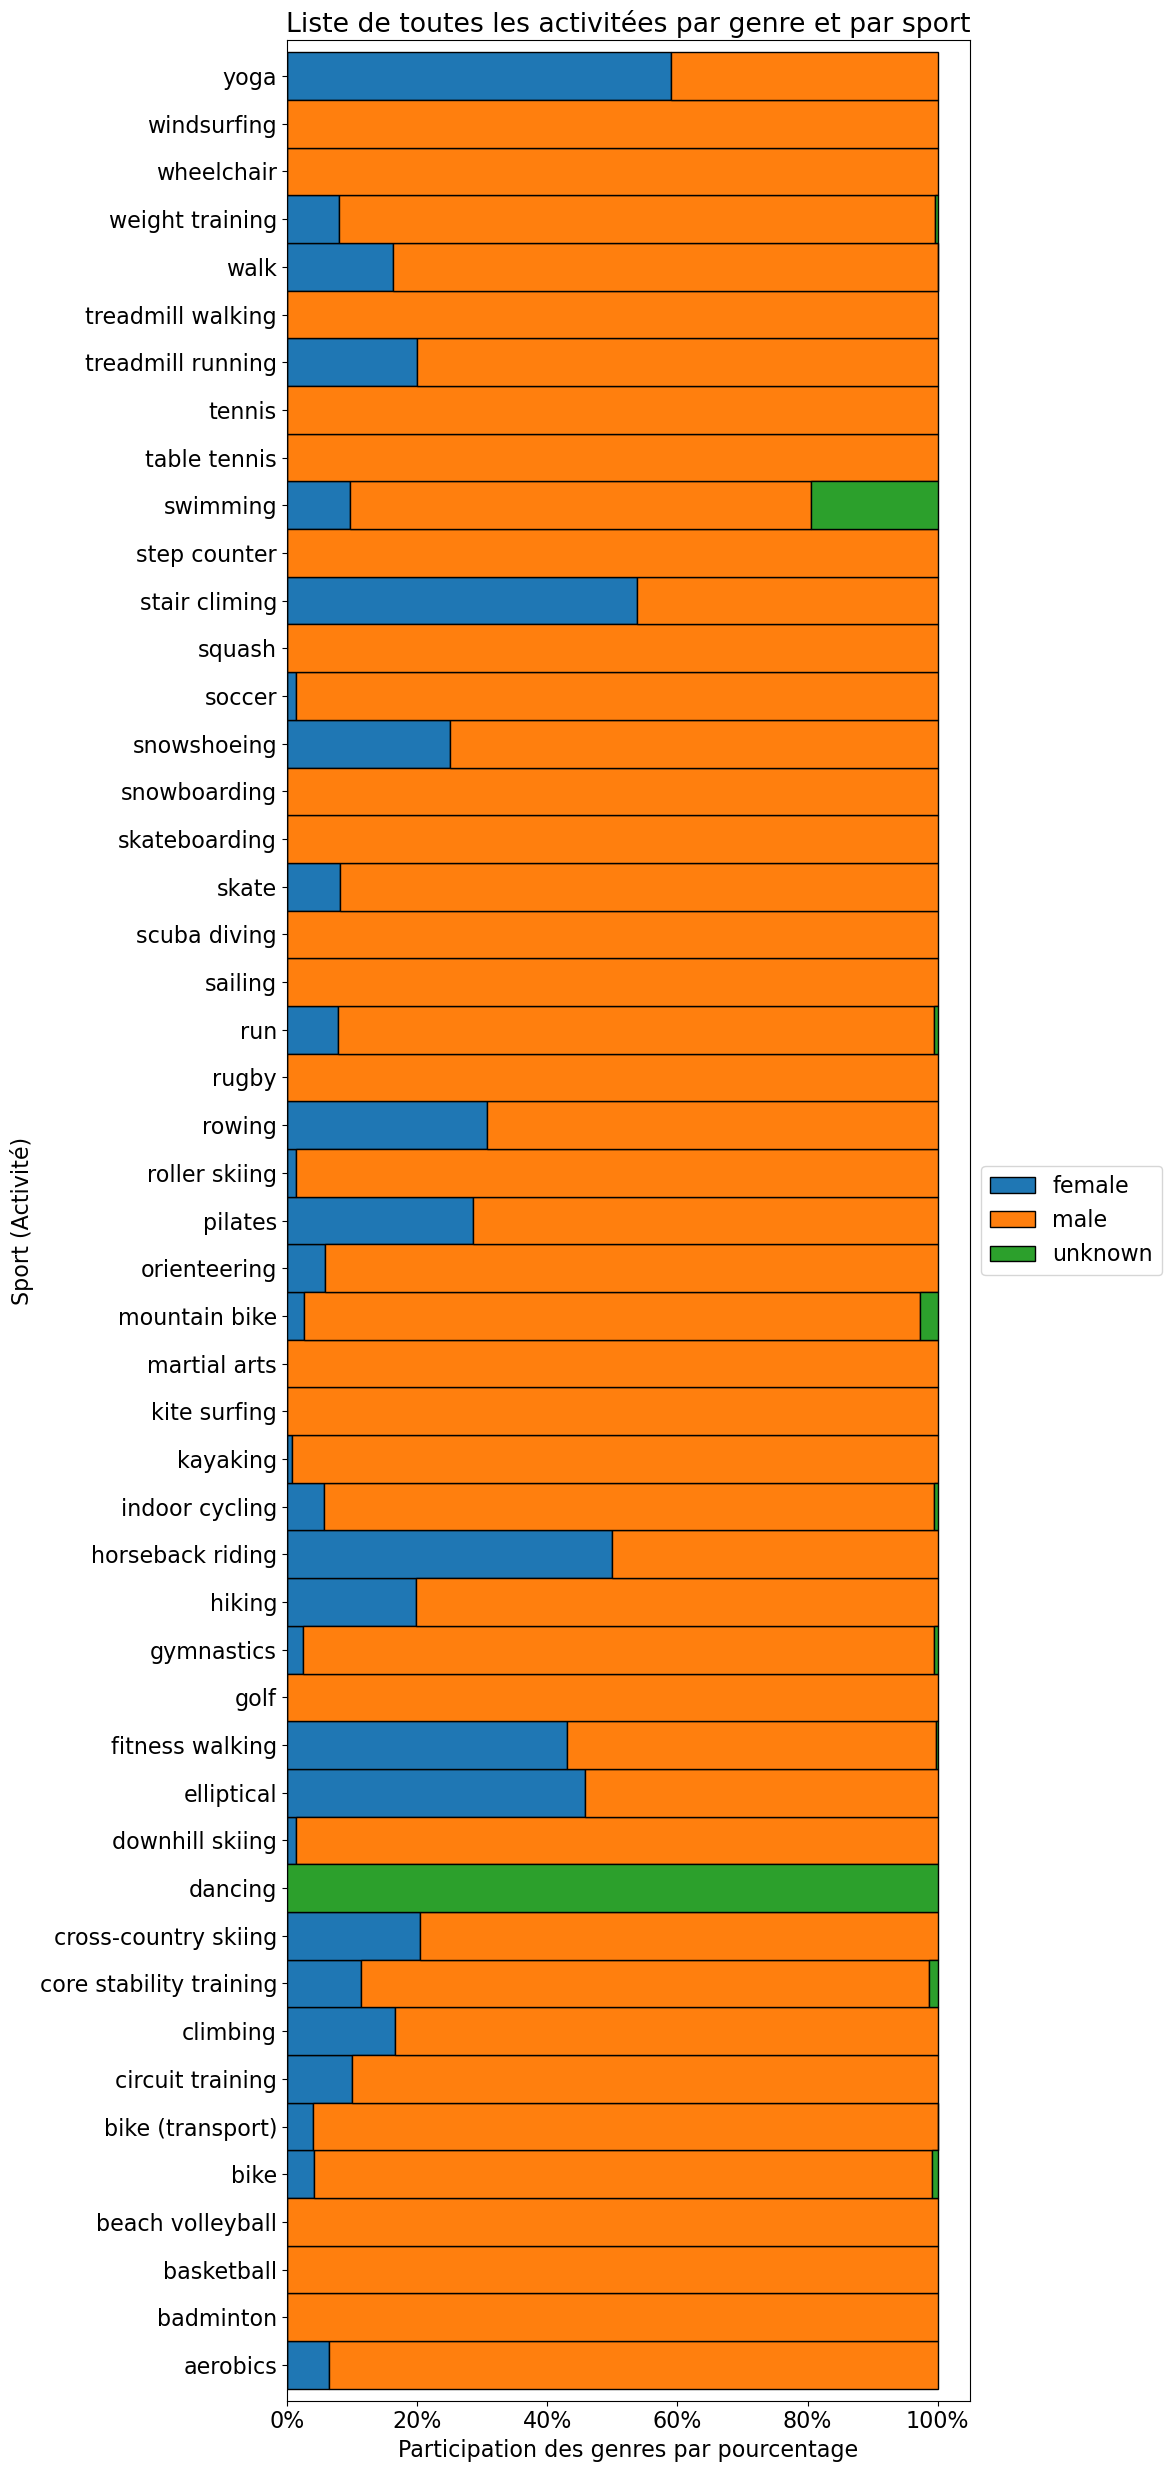

In [34]:
# Obtenir le nombre total d'activités
total_activities = ranked_sport_users_df.count()
print(f'Il Y a au total: {total_activities} activitées et voici le graphe pour les activitées basée sur le genre:')

# Ajouter les informations sur les activités en fonction du genre
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()

# Visualiser les données
fig = plt.figure(figsize=(12, 25))
grid_size = (1, 1)
ax = plt.subplot2grid(grid_size, (0, 0), colspan=1, rowspan=1)

# Remodeler les données en utilisant unstack() et créer un graphique à barres empilées
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1
                                               , edgecolor='black', ax=ax, title='Liste de toutes les activitées par genre et par sport')

# Configurer les étiquettes et la légende du graphique
ylabel = plt.ylabel('Sport (Activité)')
xlabel = plt.xlabel('Participation des genres par pourcentage')
legend = plt.legend(
    sorted(activities_by_gender['gender'].unique()), loc='center left', bbox_to_anchor=(1.0, 0.5)
)

# Mettre à jour la taille de la police et configurer le format des étiquettes de l'axe des x
param_update = plt.rcParams.update({'font.size': 16})
ax = plt.gca()
formatter = ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Ajuster l'affichage du graphique et le montrer
a = fig.tight_layout()
plt.show()


Je me demande s'il y'a des utilisateurs qui ont participé à plusieurs sports 

Faison un code qui va extraire les utilisateurs qui ont participé à plus d'un sport. Nous allons ainsi créer un DataFrame avec ces informations, en ajoutant également le genre. Ensuite, calculons les statistiques de base pour ces utilisateurs.

In [35]:
# Sélectionnons les colonnes qui nous interesse et supprimons les doublons
sport_df = df \
    .select(df.userId, df.gender, df.sport) \
    .distinct() \
    .groupBy(df.userId, df.gender) \
    .count()

# Filtrons les utilisateurs ayant participé à plus d'un sport
min_number_of_sports = 1
user_more_sports_df = sport_df \
                    .filter(sport_df["count"] > min_number_of_sports) \
                    .orderBy("count", ascending = False) \
                    .toPandas()

# Renommons les colonnes et calculons les statistiques
user_more_sports_df.rename(columns = {'count':'Sports count'}, inplace = True)
user_more_sports_df.describe().astype(int).T


,count,mean,std,min,25%,50%,75%,max
userId,822,4860464,3953412,69,1609606,3730685,7554937,15481421
Sports count,822,3,2,2,2,3,5,16


D'après le résumé:
- 822/1104 personnes ont participé à plus d'un sport. 
- En moyenne, une personne participe à environ 3 sports, et certaines personnes participent jusqu'à 16 sports !

Maintenant, nous allons examiner les statistiques par genre en utilisant un boxplot :

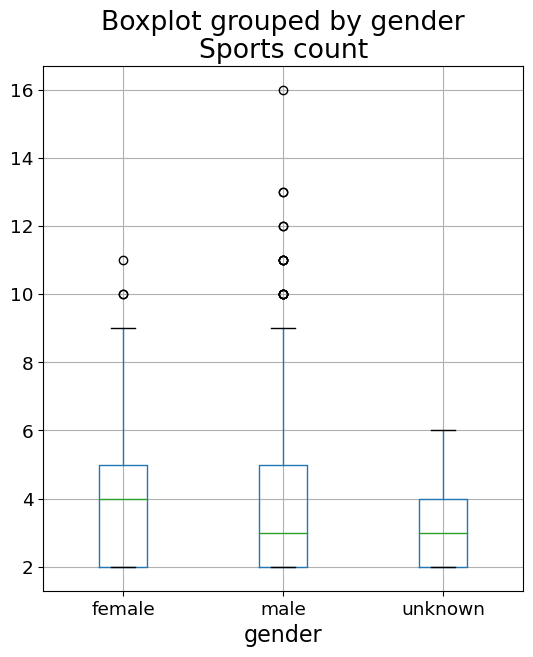

In [36]:
plot = user_more_sports_df.boxplot(column='Sports count', by='gender', fontsize='small', figsize=(6,7))

Le boxplot montre qu'à l'exception des valeurs aberrantes, les hommes et les femmes ont pratiquement la même répartition de la pratique sportive.

In [37]:
# les utilisateurs ayant au moins 10 enregistrements
qualified_df = df \
    .select(df.sport, df.userId, df.gender) \
    .groupBy(df.sport, df.userId, df.gender) \
    .count()
qualified_df = qualified_df.filter(qualified_df["count"] >= 10) \
    .orderBy("count", ascending = False)

# Calculons le nombre d'utilisateurs et le pourcentage par rapport au nombre total d'utilisateurs
print('Nombre d utilisateurs ayant plus de 10 séances d entraînement:')
qualified_pd_df = qualified_df.select("userId", "gender").distinct() \
    .groupBy(qualified_df.gender).count().toPandas()
qualified_pd_df.rename(columns={'count': 'Users count'}, inplace=True)
qualified_pd_df

qualified_users_count = sum(qualified_pd_df['Users count'])
total_users_count = df.select('userId').distinct().count()
qualified_percentage = round((qualified_users_count / total_users_count),2) * 100
print('\nIl y a donc {} / {} utilisateurs qui répondent aux critères des 10 enregistrements historiques, ce qui représente {:.2f}%' \
      .format(qualified_users_count, total_users_count, qualified_percentage)
     )


Nombre d utilisateurs ayant plus de 10 séances d entraînement:


,gender,Users count
0,unknown,13
1,female,88
2,male,886



Il y a donc 987 / 1104 utilisateurs qui répondent aux critères des 10 enregistrements historiques, ce qui représente 89.00%


Nous allons maintenant extraire les informations supplémentaires à partir de la colonne timestamp, qui est actuellement au format UNIX timestamp. Pour obtenir plus d'informations à partir de cette colonne, je vais crééer quatre nouvelles colonnes :

- date_time: conversion du timestamp UNIX en format datetime de Python
- duration: durée totale d'une séance d'entraînement, en minutes
- workout_start_time: détermination de l'heure de début d'une séance d'entraînement
- interval: liste des intervalles de temps entre chaque enregistrement timestamp unique dans une séance d'entraînement, en secondes

In [38]:
# On avait sa avant
df.limit(3).toPandas()

,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId,PerWorkoutRecordCount
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915,500
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915,500
2,"[76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....",male,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739,"[60.17326201312244, 60.173205351457, 60.172969...","[24.64995657093823, 24.650197718292475, 24.651...","[4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...",bike,"[1407858459, 1407858466, 1407858478, 140785849...",https://www.endomondo.com/users/10921915/worko...,10921915,500


In [39]:
import os
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = 'python'

# Your SparkSession creation code here


# Convertir la colonne timestamp en datetime, pour être utilisé ultérieurement avec la fonction .withColumn
def to_time(timestamp_list):
    # Convertir en datetime et soustraire 7 heures en raison de la différence entre la fenêtre de temps Endomondo et l'heure UTC, comme décrit dans les données
    return [datetime.fromtimestamp(t) - timedelta(hours=7) for t in timestamp_list]

# Enregistrer la fonction 'to_time' en tant qu'UDF dans le framework PySpark
udf_to_time = udf(to_time, ArrayType(elementType=TimestampType()))

# Fonction de support pour obtenir la durée (en minutes) d'une liste de valeurs datetime, pour être utilisée ultérieurement avec la fonction withColumn
def get_duration(datetime_list):
    time_dif = max(datetime_list) - min(datetime_list)
    return time_dif.seconds/60

# Enregistrement de la fonction de support 'get_duration' en tant que fonction définie par l'utilisateur dans le framework PySpark
udf_get_duration = udf(get_duration, FloatType())

# Fonction de support pour obtenir l'heure de début d'une séance d'entraînement de la liste datetime, pour être utilisée ultérieurement avec la fonction withColumn
def get_start_time(datetime_list):
    return min(datetime_list)

# Enregistrement de la fonction de support 'get_start_time' en tant que fonction définie par l'utilisateur dans le framework PySpark
udf_get_start_time = udf(get_start_time, TimestampType())

# Fonction de support pour obtenir la liste des intervalles de temps au sein d'une séance d'entraînement
def get_interval(datetime_list):
    if len(datetime_list) == 1:
        return [0]
    else:
        interval_list = []
        for i in range(0, len(datetime_list)-1):
            interval = (datetime_list[i+1] - datetime_list[i]).seconds
            interval_list.append(interval)
        return interval_list

# Enregistrement de la fonction de support 'get_interval' en tant que fonction définie par l'utilisateur dans le framework PySpark    
udf_get_interval = udf(get_interval, ArrayType(elementType=IntegerType()))

# Créer une nouvelle colonne 'date_time' pour convertir les timestamps en format datetime de Python pour une utilisation ultérieure
df = df.withColumn('date_time', 
    udf_to_time('timestamp'))

# Créer une colonne 'workout_start_time' pour obtenir l'heure de début de chaque séance d'entraînement/ligne :
df = df.withColumn('workout_start_time', hour(udf_get_start_time('date_time')))

# Créer une colonne duration à partir de la colonne date_time créée précédemment, en utilisant la fonction UDF udf_get_duration définie ci-dessus
df = df.withColumn('duration', udf_get_duration('date_time'))

# Créer une colonne interval à partir de la colonne date_time, en utilisant la fonction UDF udf_get_interval définie ci-dessus
df = df.withColumn('interval', udf_get_interval('date_time'))


print('Nouvelles colonnes (''date_time'', ''workout_start_time'' en heure, ''duration'' en minutes & ''interval'' en secondes), premières 5 lignes:')
df.select('timestamp','date_time', 'workout_start_time', 'duration', 'interval').limit(5).toPandas()



Nouvelles colonnes (date_time, workout_start_time en heure, duration en minutes & interval en secondes), premières 5 lignes:


Py4JJavaError: An error occurred while calling o816.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 270.0 failed 1 times, most recent failure: Lost task 0.0 in stage 270.0 (TID 2838) (oumar.mshome.net executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, Le fichier spécifié est introuvable
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:167)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: CreateProcess error=2, Le fichier spécifié est introuvable
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:458)
	at java.lang.ProcessImpl.start(ProcessImpl.java:139)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 25 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:506)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:459)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:48)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3688)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3685)
	at sun.reflect.GeneratedMethodAccessor134.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, Le fichier spécifié est introuvable
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:167)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, Le fichier spécifié est introuvable
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:458)
	at java.lang.ProcessImpl.start(ProcessImpl.java:139)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 25 more
